<H1 align="center"> Análisis del usuario @jguaido <br> <br> Twitter y herramientas de BigData para explorar datos </center></H1> <br> <br><br> 

<center> Roque Leal </center> 
<center>DataScience </center> <br> 

## Resumen

El presente Jupyter Notebook  correponde a una exploración de los datos en la red social Twitter asociados al usuario [@jguaido](https://twitter.com/jguaido?lang=es), desde el 07 de abril hasta el presente 30 de mayo del 2019, se realiza el informe como una aproximación científica de diferentes métodos para colectar y analizar datos en Twitter basado en las herramientas disponibles de Python.

In [ ]:
import tweepy           # Para consumir la API de Twitter
import pandas as pd     # Para manejo de datos
import numpy as np      # Para operaciones numéricas

# Para ploteo y visualización:
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from credentials import *
def twitter_config():

    # Autenticar y acceder usando llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Regresar acceso al API:
    api = tweepy.API(auth)
    return api

In [3]:
extractor = twitter_config()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="jguaido", count=20000)
print("Tweets obtenidos: {}.\n".format(len(tweets)))

# Imprimimos los primeros 5 tweets:
print("Los primeros 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets obtenidos: 200.

Los primeros 5 tweets:

Pueblo de Venezuela, es necesario que salgamos juntos a la calle, a respaldar a las fuerzas democráticas y a recupe… https://t.co/hyxa4yoJ5P

Fuerza Armada Nacional han tomado la decisión correcta, cuentan con el apoyo del pueblo de Venezuela, con el aval d… https://t.co/6ii0CHR0Um

Pueblo de Venezuela vamos a la calle, Fuerza Armada Nacional a continuar el despliegue hasta que consolidemos el fi… https://t.co/zE3H3YvWYC

Pueblo de Venezuela inició el fin de la usurpación. En este momento me encuentro con las principales unidades milit… https://t.co/azAjjUwLST

En el marco de nuestra constitución. Y por el cese definitivo de la usurpación. https://t.co/3RD2bnQhxt



In [4]:
datos = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(datos.head(10))

,Tweets
0,"Pueblo de Venezuela, es necesario que salgamos..."
1,Fuerza Armada Nacional han tomado la decisión ...
2,"Pueblo de Venezuela vamos a la calle, Fuerza A..."
3,Pueblo de Venezuela inició el fin de la usurpa...
4,En el marco de nuestra constitución. Y por el ...
5,"Este #1M demostremos que estamos más fuertes, ..."
6,"Mientras tanto, quien de forma cobarde trata d..."
7,¡Vamos pa'lante! \n\nEl viernes estuvimos orga...
8,RT @Presidencia_VE: ✔️CARACAS\nEste #1M inicia...
9,Lo único que tiene para ofrecer este régimen e...


In [5]:
# Añadimos datos relevantes:
datos['len'] = np.array([len(tweet.text) for tweet in tweets])
datos['ID']  = np.array([tweet.id for tweet in tweets])
datos['Creado'] = np.array([tweet.created_at for tweet in tweets])
datos['Fuente'] = np.array([tweet.source for tweet in tweets])
datos['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
datos['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [6]:
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs
0,"Pueblo de Venezuela, es necesario que salgamos...",140,1123164653704577024,2019-04-30 09:58:15,Twitter for Android,35170,25533
1,Fuerza Armada Nacional han tomado la decisión ...,140,1123164650575671296,2019-04-30 09:58:14,Twitter for Android,32167,20738
2,"Pueblo de Venezuela vamos a la calle, Fuerza A...",140,1123164648092655616,2019-04-30 09:58:14,Twitter for Android,12891,8831
3,Pueblo de Venezuela inició el fin de la usurpa...,140,1123164645739642880,2019-04-30 09:58:13,Twitter for Android,76766,48876
4,En el marco de nuestra constitución. Y por el ...,103,1123161692219686912,2019-04-30 09:46:29,Periscope,30732,26001
5,"Este #1M demostremos que estamos más fuertes, ...",140,1122997070573592576,2019-04-29 22:52:20,Twitter for Android,6855,3362
6,"Mientras tanto, quien de forma cobarde trata d...",140,1122997069269078016,2019-04-29 22:52:20,Twitter for Android,7146,3303
7,¡Vamos pa'lante! \n\nEl viernes estuvimos orga...,139,1122997065712316418,2019-04-29 22:52:19,Twitter for Android,9671,4076
8,RT @Presidencia_VE: ✔️CARACAS\nEste #1M inicia...,140,1122989384071024641,2019-04-29 22:21:47,Twitter for iPhone,0,4249
9,Lo único que tiene para ofrecer este régimen e...,140,1122965455738744832,2019-04-29 20:46:42,Twitter for Android,12773,6838


In [7]:
# Extraemos el promedio:
media = np.mean(datos['len'])

print("El promedio de caracteres en tweets: {}".format(media))

# Extraemos el tweet con más FAVs y con más RTs:
fav_max = np.max(datos['Likes'])
rt_max  = np.max(datos['RTs'])

fav = datos[datos.Likes == fav_max].index[0]
rt  = datos[datos.RTs == rt_max].index[0]

# Max FAVs:
print("El tweet con más likes es: \n{}".format(datos['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))
print("{} caracteres.\n".format(datos['len'][fav]))

# Max RTs:
print("El tweet con más retweets es: \n{}".format(datos['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(datos['len'][rt]))


El promedio de caracteres en tweets: 132.64
El tweet con más likes es: 
Pueblo de Venezuela inició el fin de la usurpación. En este momento me encuentro con las principales unidades milit… https://t.co/azAjjUwLST
Número de likes: 76766
140 caracteres.

El tweet con más retweets es: 
Pueblo de Venezuela inició el fin de la usurpación. En este momento me encuentro con las principales unidades milit… https://t.co/azAjjUwLST
Número de retweets: 48876
140 caracteres.



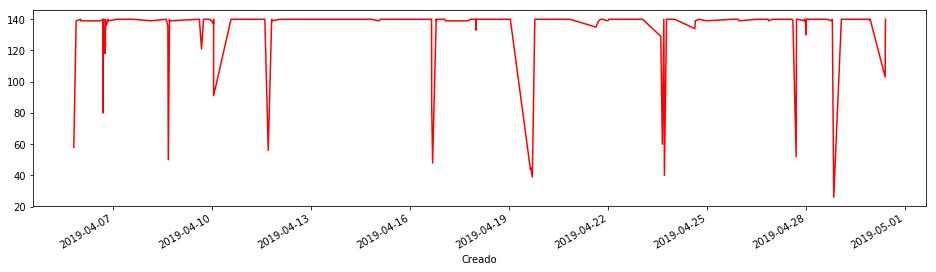

In [8]:
# Creamos series de tiempo para datos:
tlen = pd.Series(data=datos['len'].values, index=datos['Creado'])
tfav = pd.Series(data=datos['Likes'].values, index=datos['Creado'])
tret = pd.Series(data=datos['RTs'].values, index=datos['Creado'])
tlen.plot(figsize=(16,4), color='r');

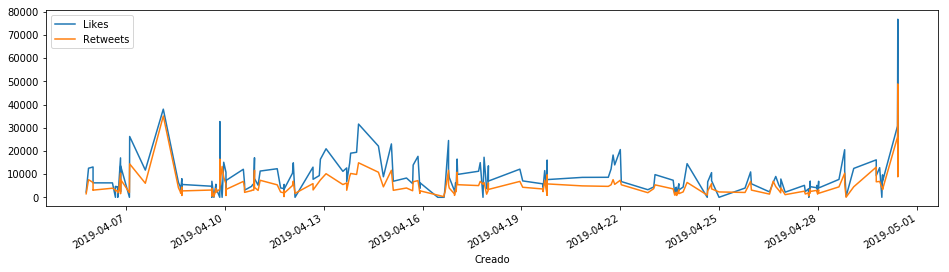

In [9]:
# Visualización de likes vs retweets:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

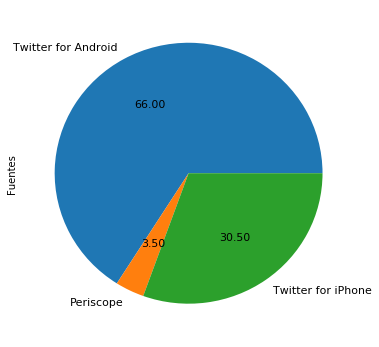

In [10]:
fuentes = []
for fuente in datos['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)
percent = np.zeros(len(fuentes))

for fuente in datos['Fuente']:
    for index in range(len(fuentes)):
        if fuente == fuentes[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=fuentes, name='Fuentes')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [11]:
from textblob import TextBlob
import re

def limpia_tweet(tweet):
   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analiza_sentimiento(tweet):
    
    analysis = TextBlob(limpia_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

datos['AdS'] = np.array([ analiza_sentimiento(tweet) for tweet in datos['Tweets'] ])
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs,AdS
0,"Pueblo de Venezuela, es necesario que salgamos...",140,1123164653704577024,2019-04-30 09:58:15,Twitter for Android,35170,25533,0
1,Fuerza Armada Nacional han tomado la decisión ...,140,1123164650575671296,2019-04-30 09:58:14,Twitter for Android,32167,20738,0
2,"Pueblo de Venezuela vamos a la calle, Fuerza A...",140,1123164648092655616,2019-04-30 09:58:14,Twitter for Android,12891,8831,0
3,Pueblo de Venezuela inició el fin de la usurpa...,140,1123164645739642880,2019-04-30 09:58:13,Twitter for Android,76766,48876,0
4,En el marco de nuestra constitución. Y por el ...,103,1123161692219686912,2019-04-30 09:46:29,Periscope,30732,26001,0
5,"Este #1M demostremos que estamos más fuertes, ...",140,1122997070573592576,2019-04-29 22:52:20,Twitter for Android,6855,3362,0
6,"Mientras tanto, quien de forma cobarde trata d...",140,1122997069269078016,2019-04-29 22:52:20,Twitter for Android,7146,3303,0
7,¡Vamos pa'lante! \n\nEl viernes estuvimos orga...,139,1122997065712316418,2019-04-29 22:52:19,Twitter for Android,9671,4076,0
8,RT @Presidencia_VE: ✔️CARACAS\nEste #1M inicia...,140,1122989384071024641,2019-04-29 22:21:47,Twitter for iPhone,0,4249,0
9,Lo único que tiene para ofrecer este régimen e...,140,1122965455738744832,2019-04-29 20:46:42,Twitter for Android,12773,6838,0


In [12]:
tweets_positivos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] > 0]
tweets_neutros   = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] == 0]
tweets_negativos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] < 0]
print("Porcentaje de tweets positivos: {}%".format(len(tweets_positivos)*100/len(datos['Tweets'])))
print("Porcentaje de tweets neutros: {}%".format(len(tweets_neutros)*100/len(datos['Tweets'])))
print("Porcentaje de tweets negativos: {}%".format(len(tweets_negativos)*100/len(datos['Tweets'])))

Porcentaje de tweets positivos: 1.5%
Porcentaje de tweets neutros: 98.0%
Porcentaje de tweets negativos: 0.5%


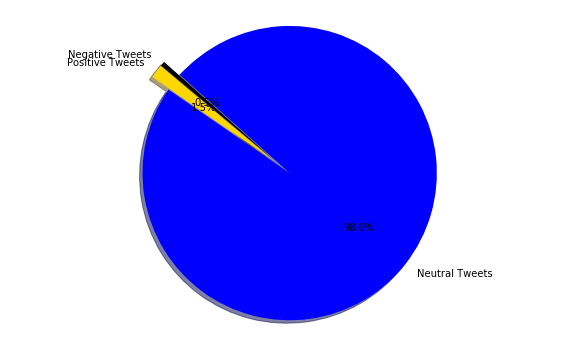

In [13]:
# Data to plot
labels = 'Positive Tweets', 'Neutral Tweets','Negative Tweets'
sizes = [len(tweets_positivos)*100/len(datos['Tweets']), len(tweets_neutros)*100/len(datos['Tweets']), len(tweets_negativos)*100/len(datos['Tweets'])]
colors = ['gold', 'blue', 'black']
explode = (0.07, 0.07, 0.07)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Comparación

En este apartado se hace una comparación de los sentimientos asociados a los usuarios de Twitter  [@jguaido](https://twitter.com/jguaido?lang=es), [@leopoldolopez](https://twitter.com/leopoldolopez?lang=es) y  [@NicolasMaduro](https://twitter.com/NicolasMaduro?lang=es) a manera de conocer los últimos 500 mensajes publicados por estos usuarios y el mensaje que estas cuentas desean transmitir.

In [16]:
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
import pandas as pd
import numpy as np
from datetime import datetime
import math
import json

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [19]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [20]:
target_terms = ["@jguaido", "@leopoldolopez","@NicolasMaduro"]

In [21]:
sentiments = []
desired = 500

In [22]:
for target in target_terms:
        counter = 0
        # Get desired number of tweets (desired = 100 in this case for each target)
        while (counter < desired):   # if desired number of tweets don't get fetched, get more 
            public_tweets = api.search(target, count=(desired-counter), result_type="recent")
            
            for tweet in public_tweets['statuses']:       # Loop through all tweets 
                results = analyzer.polarity_scores(tweet["text"])  # Run Vader Analysis on each tweet
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                # convert datetime object to string and then strip out the 10 chars(date)
                Date = str(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
                Date = Date[:19]     # extract date and time
        
                # Add sentiments for each tweet into an array
                sentiments.append({"Source": target,
                            "Text": tweet["text"],
                            "DateTime": Date, 
                            "Compound": compound,
                            "Pos": pos,
                            "Neg": neu,
                            "Neu": neg,
                            "Tweets Ago": counter+1})
                # increment counter 
                counter = counter + 1
    
sentiments_df = pd.DataFrame.from_dict(sentiments)  # Convert sentiments[] to DataFrame

sentiments_df

,Compound,DateTime,Neg,Neu,Pos,Source,Text,Tweets Ago
0,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,RT @jguaido: Pueblo de Venezuela inició el fin...,1
1,-0.2263,2019-04-30 14:02:12,0.921,0.079,0.000,@jguaido,RT @trish_regan: Just in: #Maduro shut down th...,2
2,0.4574,2019-04-30 14:02:12,0.857,0.000,0.143,@jguaido,RT @CGurisattiNTN24: Atención! Momento en el q...,3
3,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,RT @VoluntariosxVe: #TodaVenezuelaALaCalle ¡Ll...,4
4,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,RT @NTN24ve: #URGENTE @jguaido y Leopoldo Lópe...,5
5,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,RT @joseolivaresm: Reconocimiento Militar al P...,6
6,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,"RT @VP: To @jguaido, the National Assembly and...",7
7,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,RT @hfsalasromer: Somos mayoría civil y Milita...,8
8,0.6666,2019-04-30 14:02:12,0.767,0.000,0.233,@jguaido,RT @cafreeland: Watching events today in Venez...,9
9,0.0000,2019-04-30 14:02:12,1.000,0.000,0.000,@jguaido,"RT @VP: To @jguaido, the National Assembly and...",10


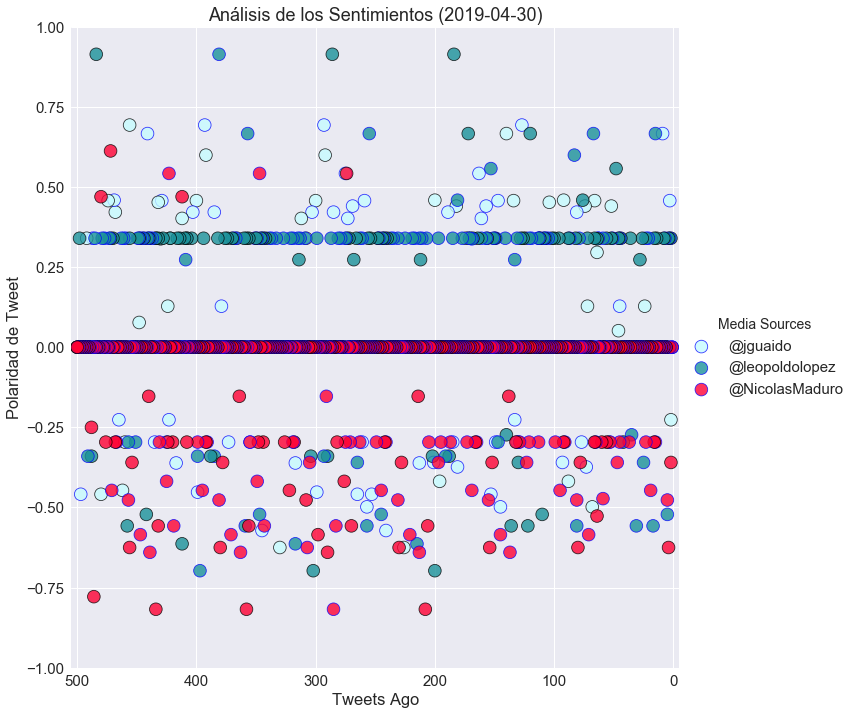

In [23]:
markersize = 160 
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_tweets = sentiments_df["Tweets Ago"].max()

pyber_palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

# rename column header to match solution example
sentiments_df.rename(columns = {'Source':'Media Sources'}, inplace = True)  

Date = Date[:10] # extract only date from string

sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue= 'Media Sources',
            size = 10,
            legend_out=True)
#plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Análisis de los Sentimientos ({})".format(Date))
plt.ylabel("Polaridad de Tweet")
plt.xlabel("Tweets Ago")
plt.xlim(max_tweets+5, -5.0)    # margins so plot doesn't end at max values
plt.ylim(-1, 1)

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()

@jguaido = 0.0240396, @leopoldolopez = 0.07986960000000018, @NicolasMaduro = -0.08559699999999994


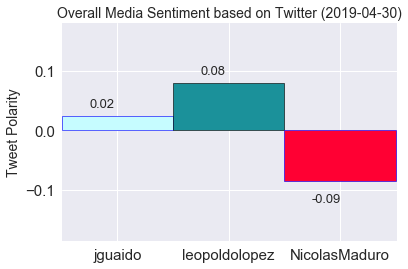

In [27]:
jguaido = sentiments_df.groupby('Media Sources')['Compound'].mean()['@jguaido']
leopoldolopez = sentiments_df.groupby('Media Sources')['Compound'].mean()['@leopoldolopez']
NicolasMaduro = sentiments_df.groupby('Media Sources')['Compound'].mean()['@NicolasMaduro']
print("@jguaido = " + str(jguaido) + ", @leopoldolopez = " + str(leopoldolopez) + ", @NicolasMaduro = " + str(NicolasMaduro))

x_labels = ['jguaido','leopoldolopez','NicolasMaduro']
y_sentiments = [jguaido,leopoldolopez,NicolasMaduro]
palette = ['#c6fcff','#1b919a','#ff0033','#000099','#ffff66']  
# light Sky blue, Green, Red, blue, Yellow

x_pos = [0,1,2]    # positions for media sources on x axis
plt.bar(x_pos, y_sentiments, color=sns.color_palette(palette,5), align='center', width = 1, edgecolor = 'bk', linewidth = .6)
plt.xlim(-0.5, len(x_labels)-0.49)   # 0.49 instead of 0.5 to show black edgeline of last bar
plt.ylim(min(y_sentiments)-0.1, max(y_sentiments)+0.1)  # margins of +/-0.1 beyond max/min values
plt.xticks(x_pos, x_labels)
plt.title("Overall Media Sentiment based on Twitter ({})".format(Date), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
for a,b in zip(x_pos, y_sentiments):  # show values of each bar in the plot
    if b <= 0:
        B = b-0.035                   # position text below bar for negative bars.  
    else:                             # Value of 'b' is preserved as its ploted (bar height)
        B = b+0.015                   # position text above bar for positive bars
    plt.text(a-0.25, B, str(round(b, 2)), fontsize = 13)  # round to 2 decimal places before plotting

# Save the figure
plt.savefig("Overall Media Sentiment based on Twitter.png")

plt.show()